In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import eig

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Q1
## PCA: Food consumption in European countries

The data food-consumption.csv contains 16 countries in Europe and their consumption for 20
food items, such as tea, jam, coffee, yogurt, and others. We will perform principal component
analysis to explore the data. In this question, please implement PCA by writing your own
code (you can use any basic packages, such as numerical linear algebra, reading data, in your
file).

First, we will perform PCA analysis on the data by treating each country’s food con-
sumption as their “feature” vectors. In other words, we will find weight vectors to combine
20 food-item consumptions for each country.

### 1. For this problem of performing PCA on countries by treating each country’s
food consumption as their “feature” vectors, explain how the data matrix is set-up in
this case (e.g., the columns and the rows of the matrix correspond to what).

In [2]:
#load data
df = pd.read_csv('food-consumption.csv')

In [3]:
df.head()

,Country,Real coffee,Instant coffee,Tea,Sweetener,Biscuits,Powder soup,Tin soup,Potatoes,Frozen fish,...,Apples,Oranges,Tinned fruit,Jam,Garlic,Butter,Margarine,Olive oil,Yoghurt,Crisp bread
0,Germany,90,49,88,19,57,51,19,21,27,...,81,75,44,71,22,91,85,74,30,26
1,Italy,82,10,60,2,55,41,3,2,4,...,67,71,9,46,80,66,24,94,5,18
2,France,88,42,63,4,76,53,11,23,11,...,87,84,40,45,88,94,47,36,57,3
3,Holland,96,62,98,32,62,67,43,7,14,...,83,89,61,81,15,31,97,13,53,15
4,Belgium,94,38,48,11,74,37,23,9,13,...,76,76,42,57,29,84,80,83,20,5


In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 21 columns):
Country           16 non-null object
Real coffee       16 non-null int64
Instant coffee    16 non-null int64
Tea               16 non-null int64
Sweetener         16 non-null int64
Biscuits          16 non-null int64
Powder soup       16 non-null int64
Tin soup          16 non-null int64
Potatoes          16 non-null int64
Frozen fish       16 non-null int64
Frozen veggies    16 non-null int64
Apples            16 non-null int64
Oranges           16 non-null int64
Tinned fruit      16 non-null int64
Jam               16 non-null int64
Garlic            16 non-null int64
Butter            16 non-null int64
Margarine         16 non-null int64
Olive oil         16 non-null int64
Yoghurt           16 non-null int64
Crisp bread       16 non-null int64
dtypes: int64(20), object(1)
memory usage: 3.6 KB


In [5]:
def pca(data: np.array, k: int) -> np.array:

    m,n = data.shape
    
    #calculate the mean of each column
    mu = np.mean(data, axis=0)

    #mean ceter the values
    centered = (data - mu) #/ m

    #calculate covariance matrix
    cov = centered.T.dot(centered)

    
    #eigendecomposition
    vals, vecs = eig(cov)
    
    #sort eigenvalues and eigenvectors
    eigVals_sorted_index = np.argsort(vals)
    vals = np.real(vals[eigVals_sorted_index[::-1]])
    vecs = np.real(vecs[eigVals_sorted_index[::-1]])

    
    #projection matrix
    p = vecs.dot(centered.T).T 

    for i in range(k):
        val = vals[i]
        p[:,i] = p[:,i] / np.sqrt(val)
    
    return vals[:k], vecs[:,:k], p[:,:k]

In [17]:
def eigendecomposition(data: np.array, k: int) -> np.array:

    #eigendecomposition
    vals, vecs = np.linalg.eig(data)
    
    #pair vals with vecs before sorting
    vals_and_vecs = list( zip( np.abs(vals) , vecs.T ) )
    


    # Select n_components eigenvectors with largest eigenvalues, obtain subspace transform matrix
    vals_and_vecs.sort(key=lambda x: x[0], reverse=True)
    vals_and_vecs = np.array(vals_and_vecs)
    W = np.hstack([vals_and_vecs[i, 1].reshape(data.shape[1], 1) for i in range(k)])

    # Return samples in new subspace
    return np.real(vals[:k]), np.real(W)



def pca(data: np.array, k: int, ret_vecs=False) -> np.array:
    
    #calculate the mean of each column
    mu = np.mean(data, axis=0)
    
    #mean ceter the values
    centered = (data - mu)
    
    #calculate covariance matrix
    cov = centered.T.dot(centered)
    
    
    #eigendecomposition
    vals, vecs = eigendecomposition(cov, k)
    
    if ret_vecs:
        return centered.dot(vecs) / np.sqrt(vals), vecs
    else:
        return centered.dot(vecs) / np.sqrt(vals)

#### 3. Now assume k = 2, i.e., we will find the first two principal components for each data point. Find the weight vectors $w_1$ and $w_2$ to extract these two principal components. Plot these two weight vectors, respectively (e.g., in MATLAB, you can use stem(w) to plot the entries of a vector w; similar things can be done in Python). Explain if you find any interesting patterns in the weight vectors.

In [18]:
data = df.iloc[:, 1:].values

In [20]:
proj, vecs = pca(data, 2, ret_vecs=True)

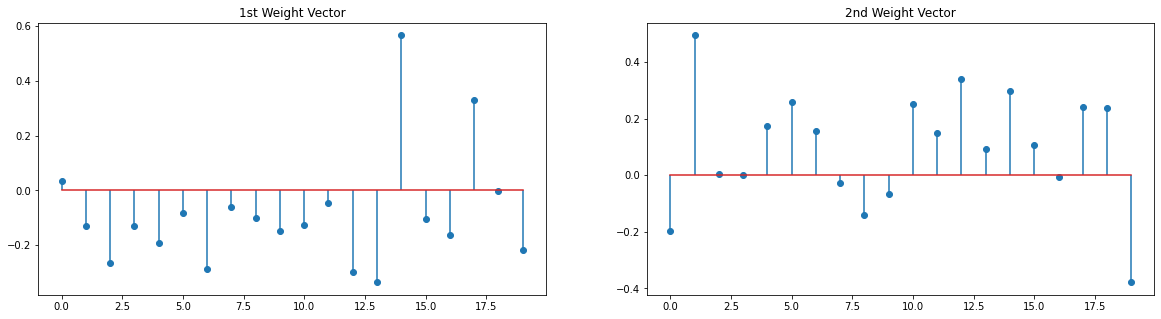

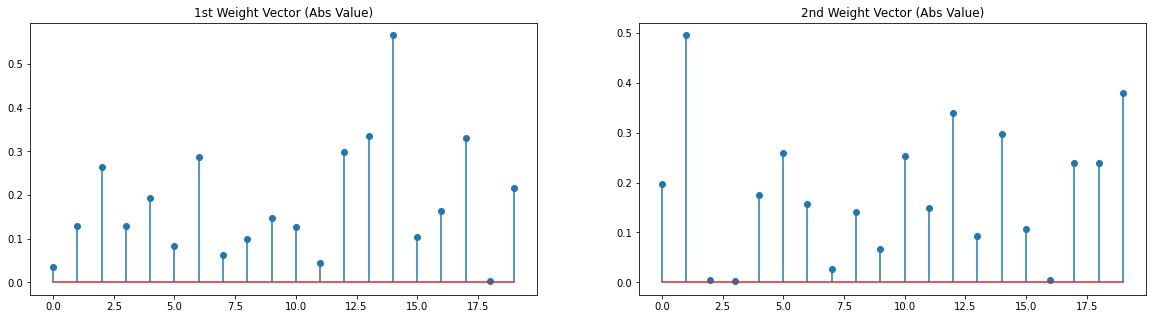

In [21]:
plt.subplots(nrows=1, ncols=2,figsize=(20,5))
plt.subplot(121)
plt.stem(vecs[:,0],use_line_collection=True)
plt.title('1st Weight Vector')
plt.subplot(122)
plt.stem(vecs[:,1],use_line_collection=True)
plt.title('2nd Weight Vector')
plt.show()

plt.subplots(nrows=1, ncols=2,figsize=(20,5))
plt.subplot(121)
plt.stem(np.abs(vecs[:,0]),use_line_collection=True)
plt.title('1st Weight Vector (Abs Value)')
plt.subplot(122)
plt.stem(np.abs(vecs[:,1]),use_line_collection=True)
plt.title('2nd Weight Vector (Abs Value)')
plt.show()

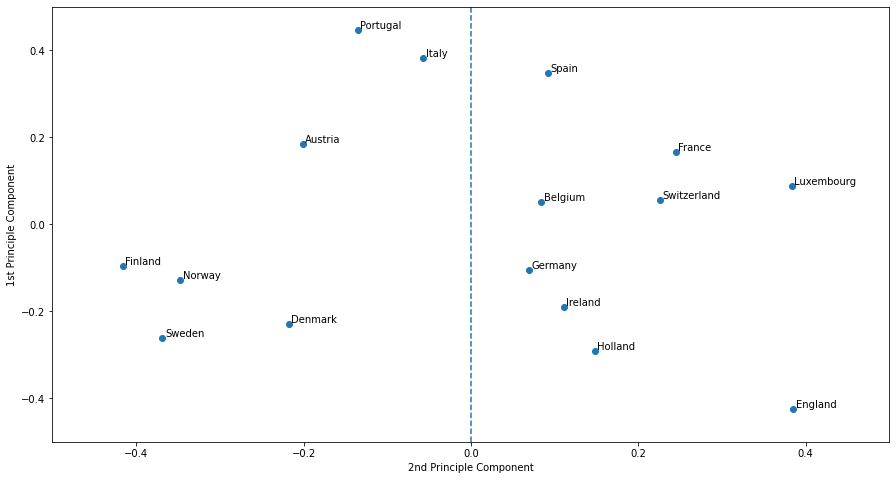

In [24]:
plt.figure(figsize=(15,8))
plt.scatter(proj[:,1], proj[:,0])

for pos, i in enumerate(df.Country.values):
    plt.text(proj[:,1][pos]+0.003, proj[:,0][pos]+0.003, i)
    
plt.plot([0]*10, np.linspace(-0.5,0.5,10), ls='--')
plt.ylim([-0.5, 0.5])
plt.xlim([-0.5, 0.5])
plt.xlabel('2nd Principle Component')
plt.ylabel('1st Principle Component')
plt.show()


In [11]:
piv = df.T.iloc[1:]
piv.columns = df.Country.values
piv

,Germany,Italy,France,Holland,Belgium,Luxembourg,England,Portugal,Austria,Switzerland,Sweden,Denmark,Norway,Finland,Spain,Ireland
Real coffee,90,82,88,96,94,97,27,72,55,73,97,96,92,98,70,30
Instant coffee,49,10,42,62,38,61,86,26,31,72,13,17,17,12,40,52
Tea,88,60,63,98,48,86,99,77,61,85,93,92,83,84,40,99
Sweetener,19,2,4,32,11,28,22,2,15,25,31,35,13,20,18,11
Biscuits,57,55,76,62,74,79,91,22,29,31,61,66,62,64,62,80
Powder soup,51,41,53,67,37,73,55,34,33,69,43,32,51,27,43,75
Tin soup,19,3,11,43,23,12,76,1,1,10,43,17,4,10,2,18
Potatoes,21,2,23,7,9,7,17,5,5,17,39,11,17,8,14,2
Frozen fish,27,4,11,14,13,26,20,20,15,19,54,51,30,18,23,5
Frozen veggies,21,2,5,14,12,23,24,3,11,15,45,42,15,12,7,3


In [12]:
data = piv.values.astype(float)

In [13]:
vecs = pca(data, 2)

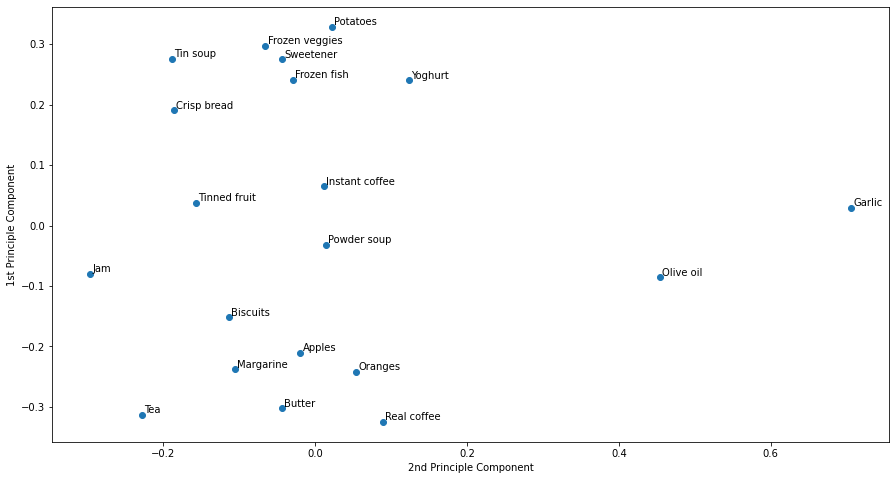

In [14]:
plt.figure(figsize=(15,8))
plt.scatter(vecs[:,1], vecs[:,0])

for pos, i in enumerate(piv.index.values):
    plt.text(vecs[:,1][pos]+0.003, vecs[:,0][pos]+0.003, i)
    
    
plt.xlabel('2nd Principle Component')
plt.ylabel('1st Principle Component')
plt.show()